<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
import Pkg
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
function binomial_p(n,k,p)
    a=(factorial(n))/((factorial(k).*factorial(n-k)))
    b=*(p.^k) .*((1-p).^(n-k))
    pdf=a.*b
    print(pdf)
end

binomial_p (generic function with 1 method)

In [3]:
binomial_p(10,2,0.4)

0.12093235199999997

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [9]:
win = binomial_p(10,5,0.4)#Answer
win = 0.20065812480000006
lose = 1-win

0.20065812480000006

0.7993418751999999

The chance of losing the bet:

In [10]:
binomial_p(10,5,0.4)
win = 0.20065812480000006
lose = 1-win #Answer

0.20065812480000006

0.7993418751999999

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [11]:
Expected_Outcome = win * 30 + lose * (-10)

-1.9736750079999963

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [12]:
binomial_p(10,4,0.4)

0.250822656

In [13]:
win1 = binomial_p(10,4,0.4)
win1 = 0.250822656
lose1 = 1-win1

0.250822656

0.749177344

In [14]:
Outcome = win1 * 30 + lose1 * (-10)

0.03290623999999909

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [15]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [20]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics
using Plots
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

In [21]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise

11-element Vector{Float64}:
  0.16588926179287622
 -0.6539088604280503
  1.593773945193603
  5.633032451931422
  9.343045782815054
  6.060925177386325
 19.781100557309884
 19.48242433449732
 23.210937481265347
 27.295100666794806
 27.417427284620164

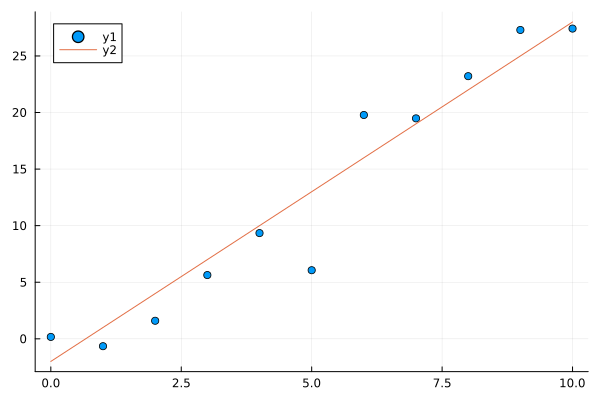

In [22]:
scatter(x,y_observed)
plot!(x,y_true)

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [24]:
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)
print(line_fit, fit_coeff)

-3.29012 + 3.19129*x[-3.2901164183869227, 3.19129143064427]

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [25]:
function chisqr(b,m,datax,y_observed,sigma)
    return sum((y_observed .- m .* datax .-b).^2/sigma^2)
end

chisqr (generic function with 1 method)

In [27]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

8.891142958312772

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [30]:
chi2_list = []
for i in 1:10000
    sigma=3
    d = di.Normal(0,sigma)
    y_observed = y_true .+ rand(d,length(x))
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end
    

In [31]:
chi2_list

10000-element Vector{Any}:
  6.859781454229502
  5.062792135977251
 11.82489122863981
  6.794550428854879
  9.134815917752
 12.906549448892902
  9.336060951733455
  4.015874055360513
  8.773802000691806
 12.487042357194303
 18.837487865435467
  9.02389295681032
 15.334362854382345
  ⋮
  4.049073352242789
 16.02089671869685
  7.816498563394411
  7.8703640290746515
 10.80096096540642
  4.409106455662754
  8.973814812603065
  6.602004279047363
 15.64865269524425
 10.088219637786912
 14.84387120805876
  6.252991743326238

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [32]:
mean(chi2_list)

9.033958969772184

The mean of 9.0 is seems about right because its a difference of total elements and number of coefficients. 

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [33]:
x_dist = 0:0.1:30
chi2=di.Chisq(2.4)
pdf_1=di.pdf.(chi2,x_dist)

301-element Vector{Float64}:
 0.0
 0.2845291570961844
 0.31089808882957704
 0.320716704014084
 0.32314288891359716
 0.3214118479538286
 0.3170906285701618
 0.3110699366311515
 0.30390770157026437
 0.29597667459702925
 0.28753734639733064
 0.2787777273870766
 0.26983672764828204
 ⋮
 4.925675602129605e-7
 4.6886856139317746e-7
 4.463087357287509e-7
 4.248333830322848e-7
 4.043904264836317e-7
 3.849302869930153e-7
 3.664057635711816e-7
 3.4877191941992065e-7
 3.319859734699566e-7
 3.1600719710619414e-7
 3.0079681583270934e-7
 2.863179156416372e-7

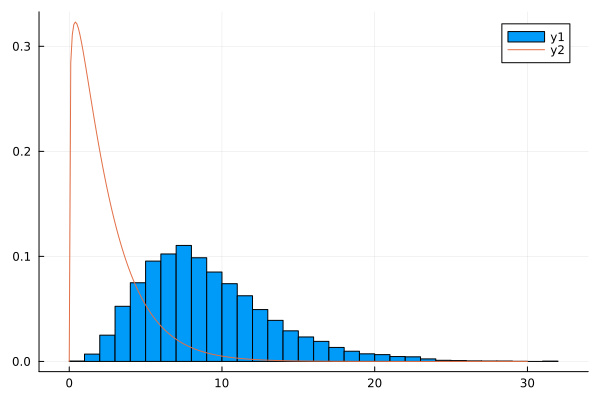

In [34]:
histogram(chi2_list, bins=50, normalize=true)
plot!(x_dist,pdf_1)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [36]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)

p_chi2poly (generic function with 1 method)

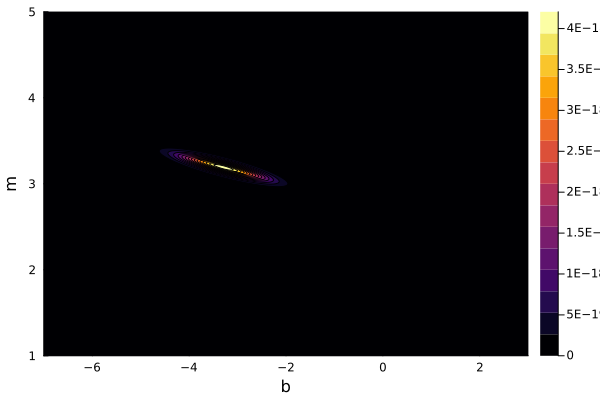

In [47]:
 m_range = 1:0.01:5
 b_range = -7:0.01:3
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

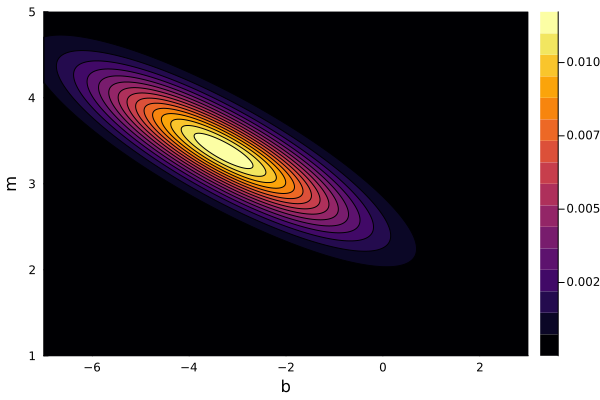

In [41]:
x1 = 0:0.5:5 
y_true1 = 3 .* x1 .- 2
y_observed1 = y_true1 .+ noise
chi2poly(b, m) = chisqr(b, m, x1, y_observed1, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The contour is geting bigger and expanding more towards left side.

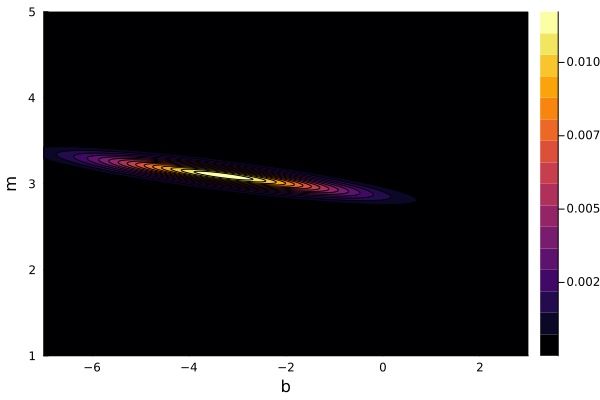

In [42]:
x2 = 0:2:20 
y_true2= 3 .* x2 .- 2
y_observed2 = y_true2 .+ noise;
chi2poly(b, m) = chisqr(b, m, x2, y_observed2, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The contour is thinner but in a same range.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

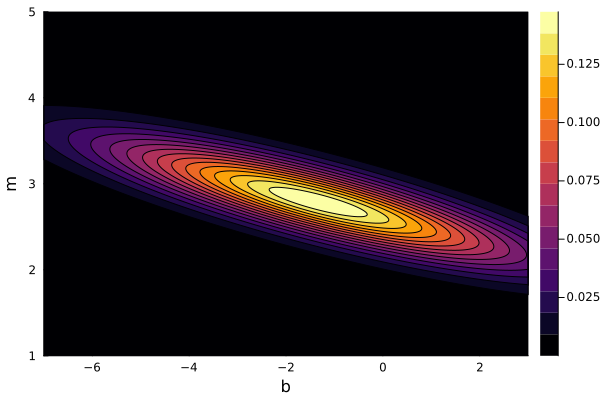

In [45]:
x3 = 0:1:10
sigma1=5
noise1=Random.rand(di.Normal(0,sigma1),length(x3))
y_true3 = 3 .* x .- 2
y_observed3= y_true3 .+ noise1;
chi2poly(b, m) = chisqr(b, m, x3, y_observed3, sigma1)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The contor is much bigger and expanding towards right side.

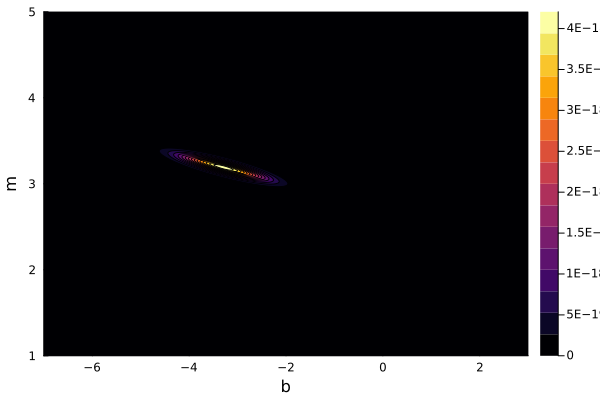

In [46]:
x4 = 0:1:10
sigma2=1
noise2=Random.rand(di.Normal(0,sigma2),length(x4))
y_true4 = 3 .* x4 .- 2
y_observed4= y_true4 .+ noise;
chi2poly(b, m) = chisqr(b, m, x4, y_observed4, sigma2)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
contourf(b_range, m_range,p_chi2poly,xlabel="b", ylabel="m")

The contour is getting smaller, thinner and going towards lest side.